In [ ]:
# Description: This program classifies if a human or an animal are present in a image

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils.np_utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [9]:
# Load the data
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [10]:
# Look at the data
print(type(x_train))
print(type(x_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [11]:
# Look at the shape of the arrays
print('x_train shape: ', x_train.shape)
print('x_test shape: ', x_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (50000, 32, 32, 3)
x_test shape:  (10000, 32, 32, 3)
y_train shape:  (50000, 1)
y_test shape:  (10000, 1)


As we can see, our data set contains 50.000 train images and 10.000 test images, each one with our classification

In [13]:
# Take a look at a image as an array
index = 150
x_train[index]

array([[[ 66,  37,  25],
        [ 75,  47,  32],
        [ 84,  56,  39],
        ...,
        [ 69,  51,  43],
        [104,  87,  73],
        [102,  86,  72]],

       [[ 72,  62,  50],
        [ 70,  61,  46],
        [116, 107,  90],
        ...,
        [ 86,  73,  68],
        [153, 141, 130],
        [148, 137, 125]],

       [[ 86,  85,  75],
        [ 79,  77,  66],
        [145, 144, 130],
        ...,
        [ 85,  77,  74],
        [156, 150, 141],
        [151, 146, 135]],

       ...,

       [[123, 131, 118],
        [124, 132, 119],
        [130, 138, 125],
        ...,
        [144, 153, 139],
        [151, 162, 148],
        [186, 197, 185]],

       [[134, 142, 129],
        [135, 143, 130],
        [140, 148, 135],
        ...,
        [144, 152, 139],
        [169, 178, 164],
        [224, 232, 222]],

       [[130, 138, 125],
        [132, 139, 127],
        [137, 145, 132],
        ...,
        [149, 156, 144],
        [186, 193, 180],
        [223, 228, 219]]

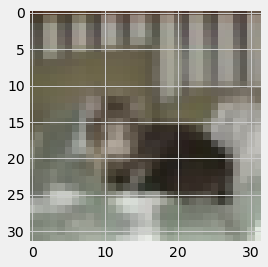

In [14]:
# Show a image
img = plt.imshow(x_train[index])

In [15]:
# Get the image classification
print('The image label is: ', y_train[index])
# From the https://www.cs.toronto.edu/~kriz/cifar.html the classification is
classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('The image class is: ', classification[y_train[index][0]])

The image label is:  [3]
The image class is:  cat


In [16]:
# Convert the labels into a set of 10 numbers to input into the neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Print labels
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [17]:
# Print the new label of the selected image
print('The one hot label is: ', y_train_one_hot[index])

The one hot label is:  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [18]:
# Normalize the pixels
x_train_normalized = x_train / 255
x_test_normalized = x_test / 255
x_train_normalized[index]

array([[[0.25882353, 0.14509804, 0.09803922],
        [0.29411765, 0.18431373, 0.1254902 ],
        [0.32941176, 0.21960784, 0.15294118],
        ...,
        [0.27058824, 0.2       , 0.16862745],
        [0.40784314, 0.34117647, 0.28627451],
        [0.4       , 0.3372549 , 0.28235294]],

       [[0.28235294, 0.24313725, 0.19607843],
        [0.2745098 , 0.23921569, 0.18039216],
        [0.45490196, 0.41960784, 0.35294118],
        ...,
        [0.3372549 , 0.28627451, 0.26666667],
        [0.6       , 0.55294118, 0.50980392],
        [0.58039216, 0.5372549 , 0.49019608]],

       [[0.3372549 , 0.33333333, 0.29411765],
        [0.30980392, 0.30196078, 0.25882353],
        [0.56862745, 0.56470588, 0.50980392],
        ...,
        [0.33333333, 0.30196078, 0.29019608],
        [0.61176471, 0.58823529, 0.55294118],
        [0.59215686, 0.57254902, 0.52941176]],

       ...,

       [[0.48235294, 0.51372549, 0.4627451 ],
        [0.48627451, 0.51764706, 0.46666667],
        [0.50980392, 0

In [19]:
# Create the models architecture
model = Sequential()

# First Layer
model.add(Conv2D(32, (5,5), activation = 'relu', input_shape=(32, 32, 3)))

# Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another Convolution layer
model.add(Conv2D(32, (5,5), activation = 'relu'))

# Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening layer
model.add(Flatten())

# Add a layer with 1000 neurons
model.add(Dense(1000, activation='relu'))

# Add a drop out layer
model.add(Dropout(0.5))

# Add a layer with 500 neurons
model.add(Dense(500, activation='relu'))

# Add a drop out layer
model.add(Dropout(0.5))

# Add a layer with 250 neurons
model.add(Dense(250, activation='relu'))

# Add a layer with 10 neurons
model.add(Dense(10, activation='softmax'))

In [20]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [21]:
# Train
hist = model.fit(x_train_normalized, y_train_one_hot, batch_size = 256, epochs = 10, validation_split= 0.2)

Epoch 1/10
157/157 [==============================] - 41s 254ms/step - loss: 1.8441 - accuracy: 0.3150 - val_loss: 1.5375 - val_accuracy: 0.4330
Epoch 2/10
157/157 [==============================] - 39s 247ms/step - loss: 1.4689 - accuracy: 0.4577 - val_loss: 1.3383 - val_accuracy: 0.5185
Epoch 3/10
157/157 [==============================] - 37s 231ms/step - loss: 1.3264 - accuracy: 0.5181 - val_loss: 1.3568 - val_accuracy: 0.5101
Epoch 4/10
157/157 [==============================] - 34s 215ms/step - loss: 1.2379 - accuracy: 0.5572 - val_loss: 1.1783 - val_accuracy: 0.5787
Epoch 5/10
157/157 [==============================] - 35s 222ms/step - loss: 1.1572 - accuracy: 0.5889 - val_loss: 1.1085 - val_accuracy: 0.6052
Epoch 6/10
157/157 [==============================] - 35s 221ms/step - loss: 1.0835 - accuracy: 0.6160 - val_loss: 1.0532 - val_accuracy: 0.6282
Epoch 7/10
157/157 [==============================] - 34s 216ms/step - loss: 1.0179 - accuracy: 0.6405 - val_loss: 1.0253 - val_ac

In [22]:
# Evaluate the model with the test dataset
model.evaluate(x_test_normalized, y_test_one_hot)[1]

313/313 [==============================] - 3s 10ms/step - loss: 0.9773 - accuracy: 0.6583


0.65829998254776

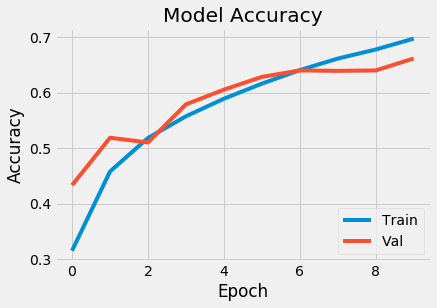

In [23]:
# Visualize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

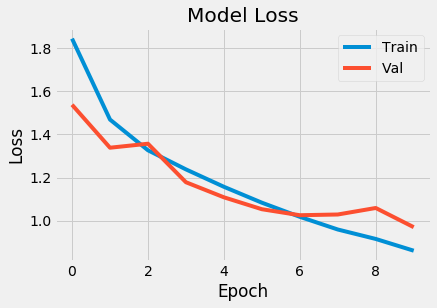

In [24]:
# Visualize the models lost
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

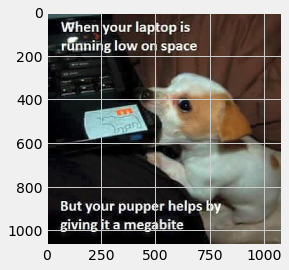

In [49]:
# Test the model with an example
test_img = plt.imread('imgs/dog.jpeg')
plt.imshow(test_img)

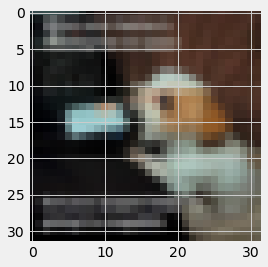

In [50]:
#Resize the image
from skimage.transform import resize
resized_image = resize(test_img, (32, 32, 3))
img = plt.imshow(resized_image)

In [51]:
# Get the models predictions
predictions = model.predict(np.array([resized_image]))
predictions

array([[0.14056025, 0.09211849, 0.0617757 , 0.04827354, 0.03638059,
        0.02483064, 0.0171083 , 0.06793526, 0.28958824, 0.22142895]],
      dtype=float32)

In [52]:
# Sort the predictions
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions

for i in range(10):
    for j in range(10):
        if x[0][list_index[i]] > x[0][list_index[j]]:
            temp = list_index[i]
            list_index[i] = list_index[j]
            list_index[j] = temp
# Show the sorted labels in order
print(list_index)
for i in range(5):
    print(classification[list_index[i]], ":", round(predictions[0][list_index[i]] * 100, 2), '%')

[8, 9, 0, 1, 7, 2, 3, 4, 5, 6]
ship : 28.96 %
truck : 22.14 %
airplane : 14.06 %
automobile : 9.21 %
horse : 6.79 %
